In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams["figure.figsize"] = (9,6)

# How do we model Time Series? Part II

## Introduction to Moving Average Processes

Assumptions:

1. $X_t$ is a stock price of a company
2. Each daily announcement of the company is modeled as a noise
3. These daily announcements are affecting the stock price (noises $Z_t$)
4. and the effects might last few days (say 2 days)

Thus, we can think of the stock price as a linear combination of the noises until two days back:
$X_t = Z_t + \theta_1Z_{t-1} + \theta_2Z_{t-2}$

Where $\theta$ represents the weights of the corresponding iid. noise $Z_t$ on the stock price.  
This model is an example of moving average model of order 2: $MA(2)$

## Simulating MA(2)

In [2]:
# Define a random seed to make our array reproducible
np.random.seed(32)

# generate noise
noise = np.random.normal(size=10000)
# place holder
ma_2 = np.zeros(10000)
# simulate MA(2)
for i in range(3, 10000):
    ma_2[i] = noise[i] + 0.7*noise[i-1] + 0.2*noise[i-2]

# shift data to left by 2 units:
moving_average_process = ma_2[3:10000]


AttributeError: 'Line2D' object has no property 'ylabel'

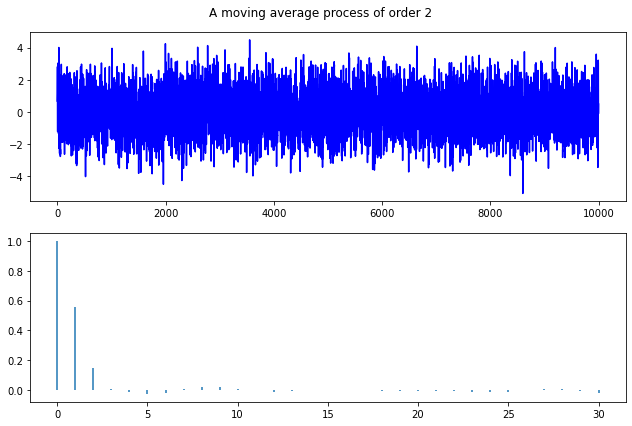

In [3]:
# Stacked subplots
fig, axs = plt.subplots(2)
fig.suptitle('A moving average process of order 2')
axs[0].plot(moving_average_process, 'b-')
fig.tight_layout()
a = plot_acf(moving_average_process, 
                  title='Correlogram of a moving average process of order 2', 
                  lags=30, ax=axs[1], ylabel='ACF') 